/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


[ 50.    49.75  49.5   49.25  49.    48.75  48.5   48.25  48.    47.75
  47.5   47.25  47.    46.75  46.5   46.25  46.    45.75  45.5   45.25
  45.    44.75  44.5   44.25  44.    43.75  43.5   43.25  43.    42.75
  42.5   42.25  42.    41.75  41.5   41.25  41.    40.75  40.5   40.25
  40.    39.75  39.5   39.25  39.    38.75  38.5   38.25  38.    37.75
  37.5   37.25  37.    36.75  36.5   36.25  36.    35.75  35.5   35.25
  35.    34.75  34.5   34.25  34.    33.75  33.5   33.25  33.    32.75
  32.5   32.25  32.    31.75  31.5   31.25  31.    30.75  30.5   30.25
  30.    29.75  29.5   29.25  29.    28.75  28.5   28.25  28.    27.75
  27.5   27.25  27.    26.75  26.5   26.25  26.    25.75  25.5   25.25
  25.    24.75  24.5   24.25  24.    23.75  23.5   23.25  23.    22.75
  22.5   22.25  22.    21.75  21.5   21.25  21.    20.75  20.5   20.25
  20.    19.75  19.5   19.25  19.    18.75  18.5   18.25  18.    17.75
  17.5   17.25  17.    16.75  16.5   16.25  16.    15.75  15.5   15.25
  15. 

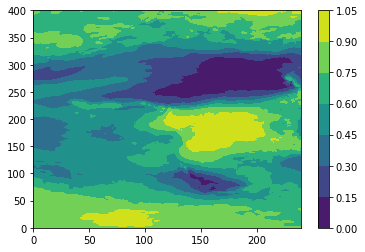

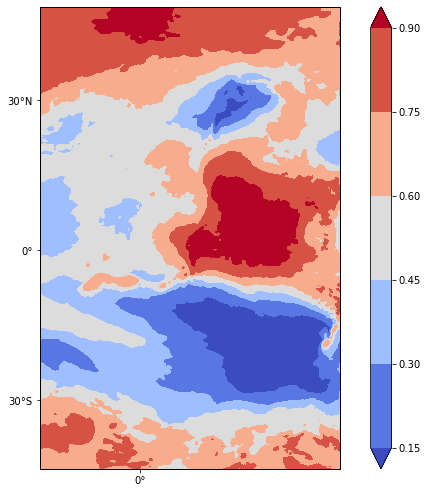

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE

# My dataset of choice is ERA5 monthly averaged data on single levels from 1979 to present, which is the fifth 
# generation ECMWF renalysis for the global climate and weather for the past 4 to 7 decades. I plan to look at 
# the variables of total cloud cover, total precipitation, and column cloud liquid water in Africa to answer the
# question: Has mean precipitable water changed significantly in the African monsoon region over the last 70 years? 
# In which season? And how is that change related to changes in clouds?

f= 'ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
#print(DS1)
data_lat= DS1.latitude.values #latitudes
data_lon= DS1.longitude.values #longitudes
print(data_lat)
print(data_lon)
nlats = len(data_lat[:]) #length of latitude array
nlons = len(data_lon[:]) #length of longitude array
time = DS1.time #time array
#convective_precipitation = DS1.cp.values
#large_scale_precip = DS1.lsp.values
total_cloud_cover = DS1.tcc #total cloud cover
total_precip= DS1.tp #total precipitation
column_cloud_lw = DS1.tclw #total column cloud liquid water

# Part A: Make a contour plot of the first time


ds_mean = DS1.mean(axis=(1))
#print(ds_mean)
#time = ds_mean.time #time array
#convective_precipitation = DS1.cp.values
#large_scale_precip = DS1.lsp.values
total_cloud_cover = ds_mean.tcc #total cloud cover
total_precip= ds_mean.tp #total precipitation
column_cloud_lw = ds_mean.tclw #total column cloud liquid water



plt.contourf(ds_mean['tcc'][0,-1::-1,:])
plt.colorbar()

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-20, 40, -40, 45])

# Make a filled contour plot
#ax.contourf(data_lon, data_lat, ds_mean['tcc'],
            #transform = ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tcc'][0,-1::-1,:]
data, lons = add_cyclic_point(data, coord=data_lon)


# Make a filled contour plot
cs=ax.contourf(lons, data_lat, data,
            transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both')

# Add coastlines
#ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-20, 40, -40, 45])
cbar = plt.colorbar(cs)